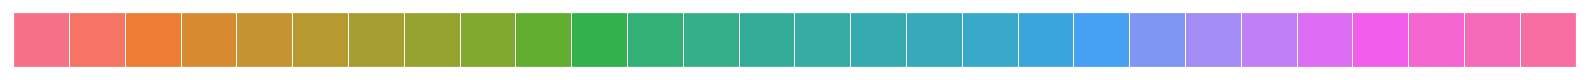

In [30]:
sns.palplot(sns.color_palette("husl", 28))


In [1]:
import pickle
from visualize import *
import matplotlib.pyplot as plt
import os
plt.switch_backend('agg')
os.environ['KMP_DUPLICATE_LIB_OK']='True'
%matplotlib inline

def plot_poincare_disc(x, labels_txt, 
                       labels=None, labels_name='labels', labels_order=None, 
                       file_name=None, coldict=None,
                       title_name=None, leg=False,
                       d1=6.0, d2=6.0, fs=11, ms=80, 
                       col_palette=plt.get_cmap("tab10"), bbox=(1.3, 0.7)):    

    df = pd.DataFrame(x, columns=['pm1', 'pm2'])
    
    fig = plt.figure(figsize=(d1, d2))
    ax = plt.gca()
    circle = plt.Circle((0, 0), radius=1,  fc='none', color='black')
    ax.add_patch(circle)
    ax.plot(0, 0, '.', c=(0, 0, 0), ms=4)
    fig.tight_layout()
    ax.axis('off')
    ax.axis('equal')
    if not (title_name is None):
        ax.set_title(title_name, fontsize=fs)

    if not (labels is None):
        df[labels_name] = labels
        
    
#         # if coldict is None:
#             # coldict = dict(zip(labels_order, col_palette[:len(labels)]))
#     print(df['labels'].values)
    sns.scatterplot(x="pm1", y="pm2", hue=labels_name, 
#                     hue_order=labels_order,
                    palette='Set1',
                    alpha=0.7, edgecolor="none",
                    data=df, ax=ax, s=ms)
    
    if leg == False:
        ax.legend_.remove()
    else:
        ax.legend(fontsize=fs, loc='outside', bbox_to_anchor=bbox)
            
#     else:
#     sns.scatterplot(x="pm1", y="pm2",
#                     data=df, ax=ax, s=ms)

    if not (labels_txt is None):
      labels_list = np.unique(labels_txt)
      for l in labels_list:
  #         i = np.random.choice(np.where(labels == l)[0])
          ix_l = np.where(labels_txt == l)[0]
          c1 = np.median(x[ix_l, 0])
          c2 = np.median(x[ix_l, 1])
          ax.text(c1, c2, l, fontsize=fs)


    if file_name:
        plt.savefig(file_name + '.pdf', format='pdf')
    plt.show()
    plt.close(fig)


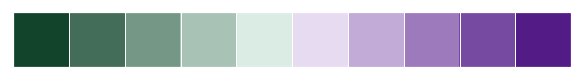

In [28]:
current_palette = sns.diverging_palette(145, 280, s=85, l=25, n=10)

sns.palplot(current_palette)

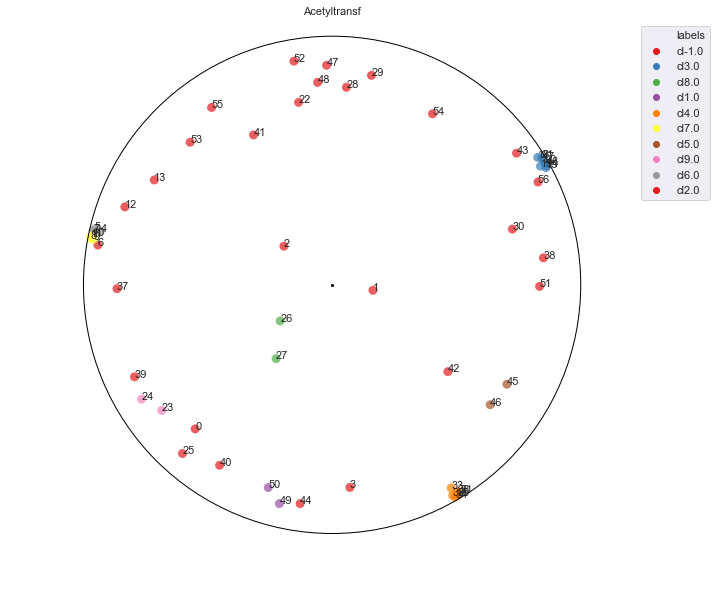

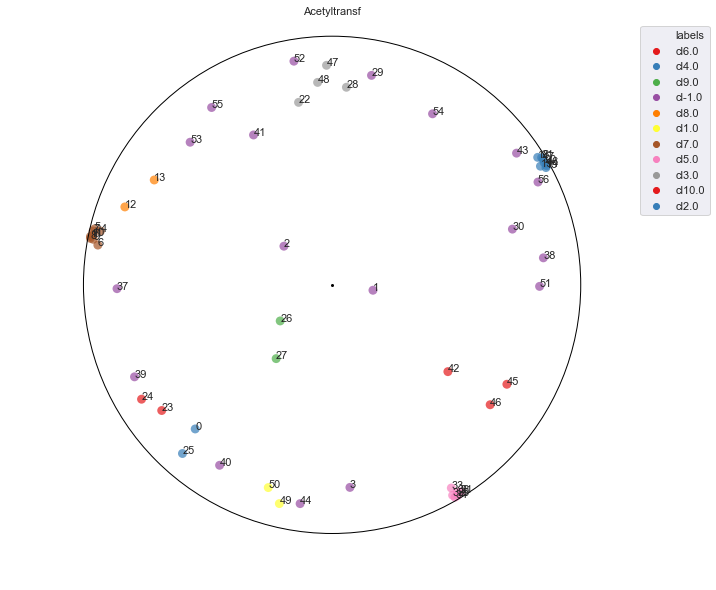

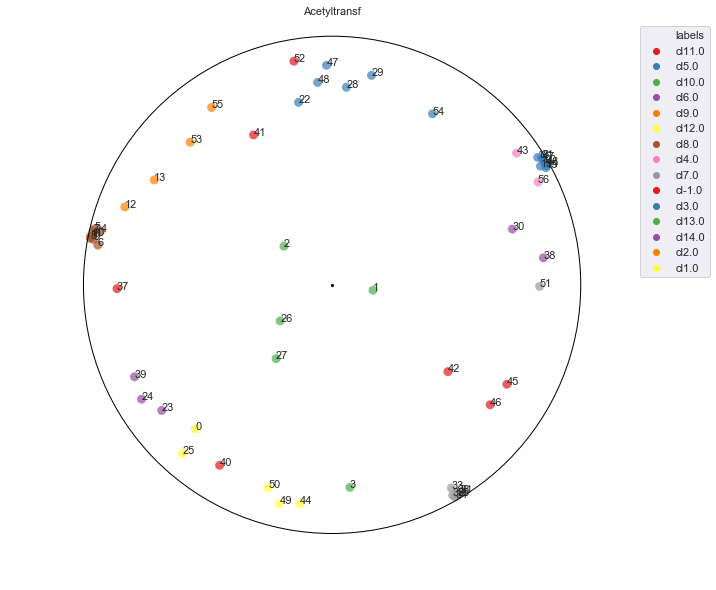

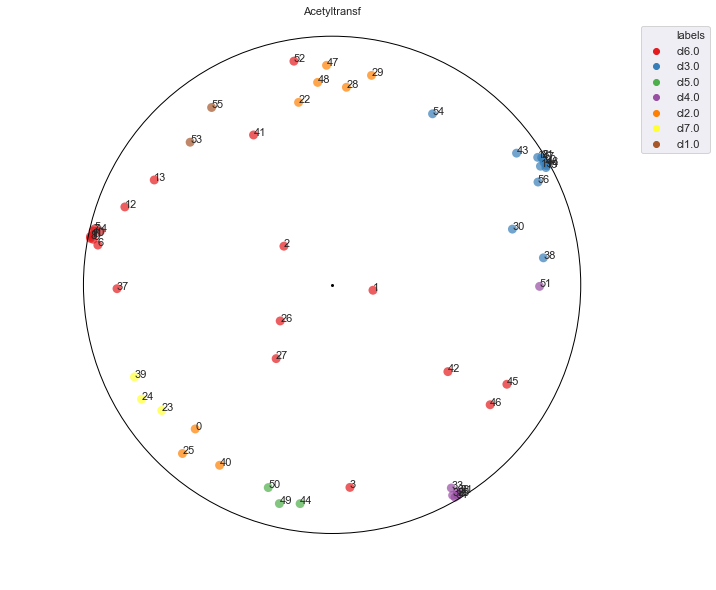

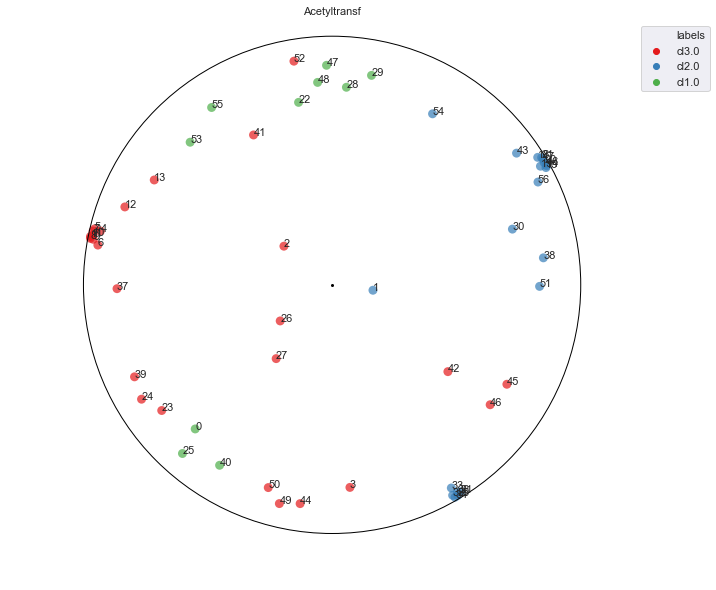

In [172]:
protein_family_name = 'Acetyltransf'
df = pd.read_csv(f'../results/{protein_family_name}_PM3sigma=1.00gamma=1.00cosinepca=0_seed0.csv')
embedding = df[['pm1', 'pm2']].values
labels = df['proteins']

for color_level in range(1, 6):
    pkl_file = open(f'../results/{protein_family_name}_colors_{color_level}.pkl', 'rb')
    colors = pickle.load(pkl_file)
    pkl_file.close()
    color_clusters = []
    for l in labels:
        color_clusters.append('cl'+str(colors[l]))
    color_clusters = np.array(color_clusters)
    fout = f'../results/{protein_family_name}_PM4sigma=1.00gamma=1.00cosinepca=0_seed0_colors_{color_level}'
    plot_poincare_disc(embedding, labels, 
                       title_name=protein_family_name,
                       labels=color_clusters, 
                       coldict=None, file_name=fout, d1=8.5, d2=8.0, bbox=(1.2, 1.), leg=True)


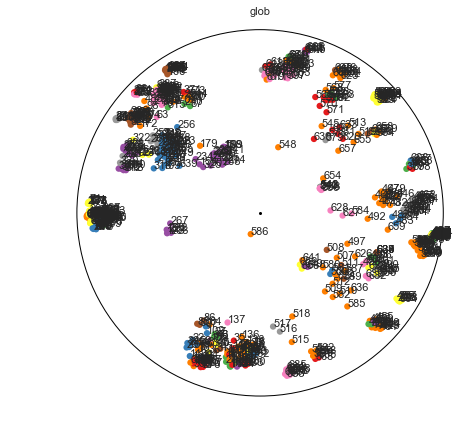

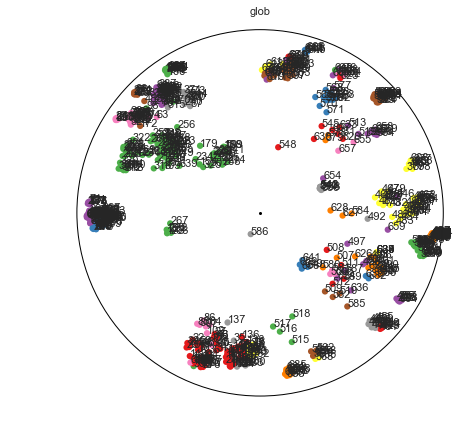

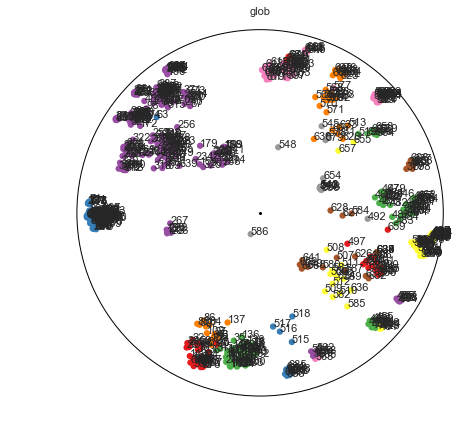

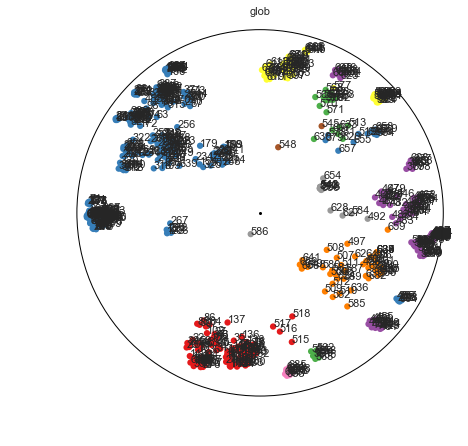

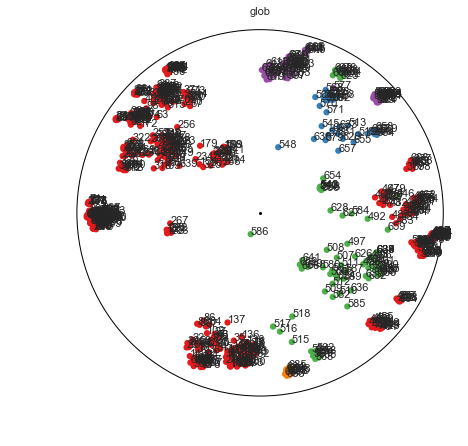

In [140]:
protein_family_name = 'glob'
df = pd.read_csv(f'../results/{protein_family_name}_PM5sigma=1.00gamma=4.00cosinepca=0_seed0.csv')
embedding = df[['pm1', 'pm2']].values
labels = df['proteins']

for color_level in range(1, 6):
    pkl_file = open(f'../results/{protein_family_name}_colors_{color_level}.pkl', 'rb')
    colors = pickle.load(pkl_file)
    pkl_file.close()
    color_clusters = []
    for l in labels:
        color_clusters.append('cl'+str(colors[l]))
    color_clusters = np.array(color_clusters)
    fout = f'../results/{protein_family_name}_PM4sigma=1.00gamma=1.00cosinepca=0_seed0_colors_{color_level}'
    plot_poincare_disc(embedding, labels, 
                       title_name=protein_family_name,
                       labels=color_clusters, 
                       coldict=None, file_name=fout, d1=6.5, d2=6.0, bbox=(1.2, 1.))


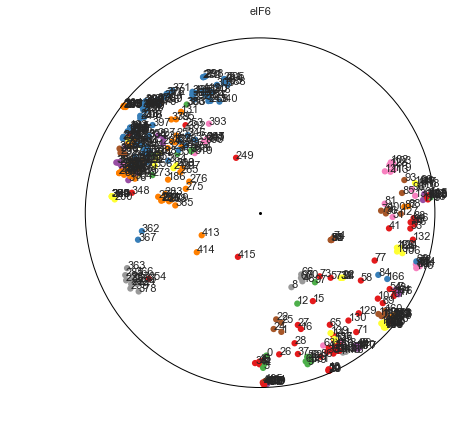

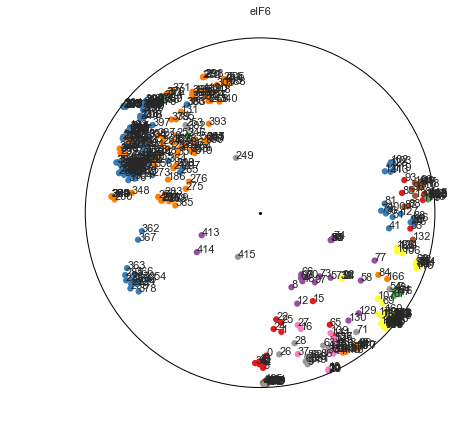

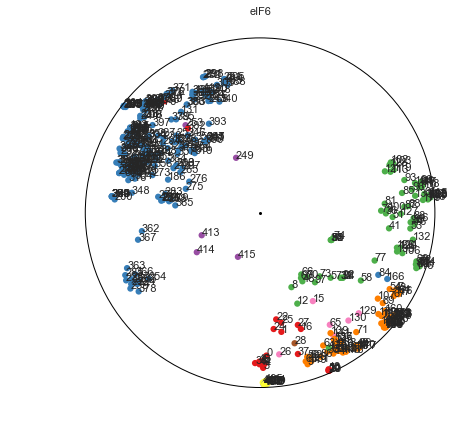

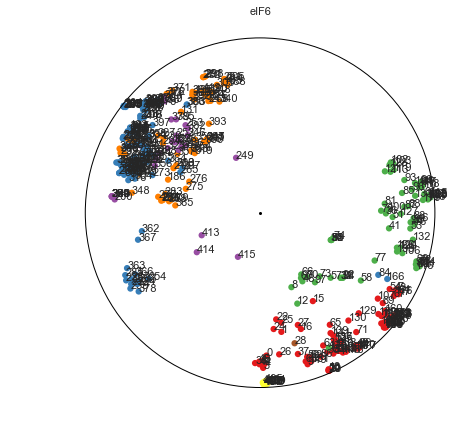

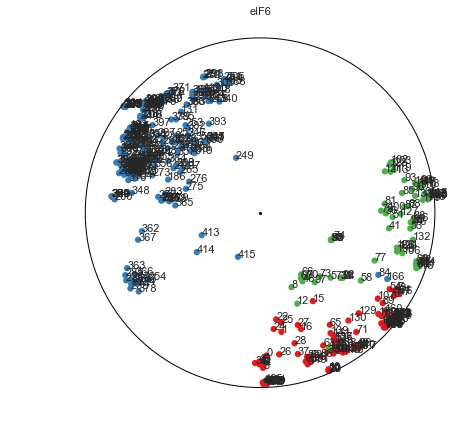

In [137]:
protein_family_name = 'eIF6'
knn=5
gamma=2.0
df = pd.read_csv(f'../results/{protein_family_name}_PM{knn}sigma=1.00gamma={gamma:.2f}cosinepca=0_seed0.csv')
embedding = df[['pm1', 'pm2']].values
labels = df['proteins']

for color_level in range(1, 6):
    pkl_file = open(f'../data/{protein_family_name}/{protein_family_name}_tree_cluster_{color_level}.pkl', 'rb')
    colors = pickle.load(pkl_file)
    pkl_file.close()
    color_clusters = []
    for l in labels:
        color_clusters.append('cl'+str(colors[l]))
    color_clusters = np.array(color_clusters)
    fout = f'../results/{protein_family_name}_PM{knn}sigma=1.00gamma={gamma:.2f}cosinepca=0_seed0_colors_{color_level}'
    plot_poincare_disc(embedding, labels, 
                       title_name=protein_family_name,
                       labels=color_clusters, 
                       coldict=None, file_name=fout, d1=6.5, d2=6.0, bbox=(1.2, 1.))


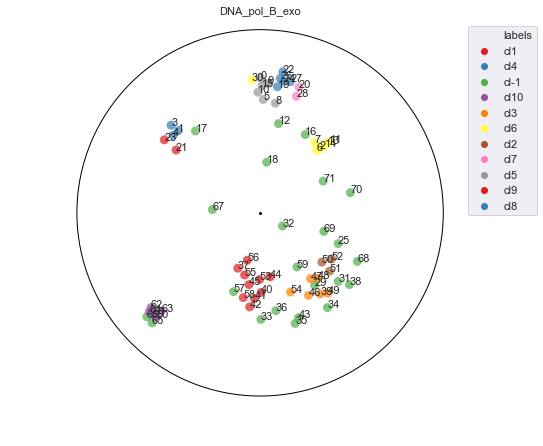

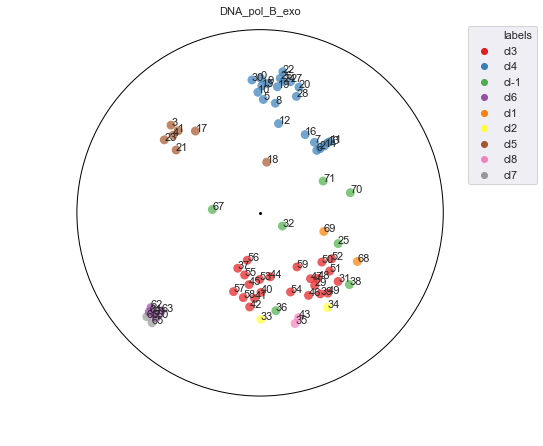

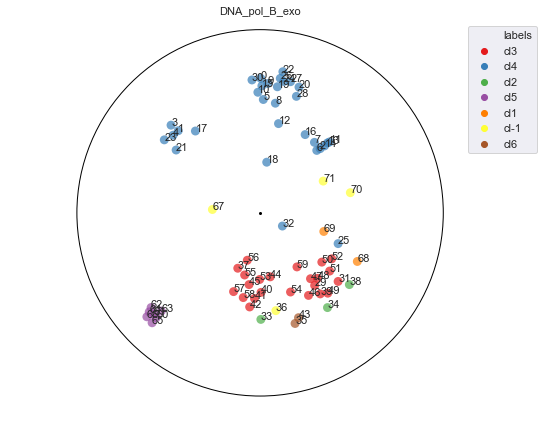

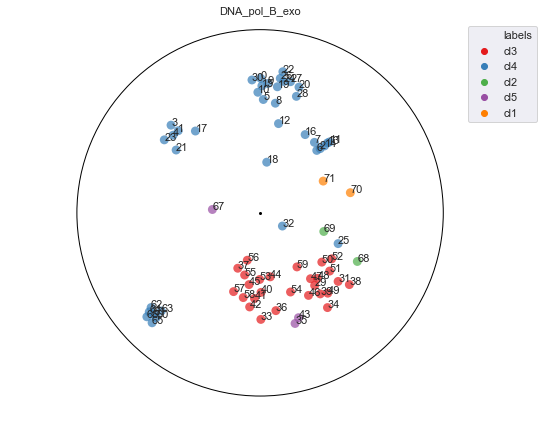

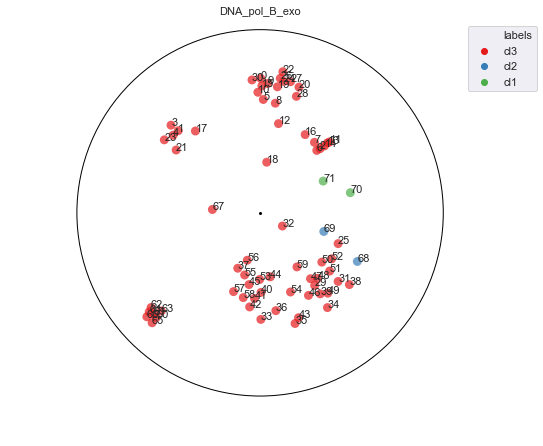

In [174]:
protein_family_name = 'DNA_pol_B_exo'
knn=5
gamma=2.0
df = pd.read_csv(f'../results/{protein_family_name}_PM{knn}sigma=1.00gamma={gamma:.2f}cosinepca=0_seed0.csv')
embedding = df[['pm1', 'pm2']].values
labels = df['proteins']

for color_level in range(1, 6):
    pkl_file = open(f'../data/{protein_family_name}/{protein_family_name}_tree_cluster_{color_level}.pkl', 'rb')
    colors = pickle.load(pkl_file)
    pkl_file.close()
    color_clusters = []
    for l in labels:
        color_clusters.append('cl'+str(colors[l]))
    color_clusters = np.array(color_clusters)
    fout = f'../results/{protein_family_name}_PM{knn}sigma=1.00gamma={gamma:.2f}cosinepca=0_seed0_colors_{color_level}'
    plot_poincare_disc(embedding, labels, 
                       title_name=protein_family_name,
                       labels=color_clusters, 
                       coldict=None, file_name=fout, d1=6.5, d2=6.0, bbox=(1.2, 1.), leg=True)


In [144]:
import sklearn.datasets


In [151]:
X, t = sklearn.datasets.make_swiss_roll(n_samples=300, noise=0.0, random_state=None)

In [152]:
df = pd.DataFrame(X, columns=['sr1', 'sr2',  'sr3'])

In [161]:
df['labels'] = [str(i) for i in  np.round(t)]

In [163]:
df.to_csv('swissroll.csv', index=False, sep=',')

TypeError: can only concatenate str (not "int") to str

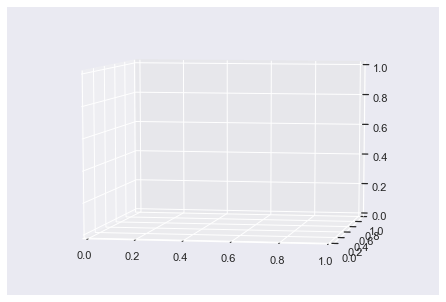

In [166]:
# Plot result
import mpl_toolkits.mplot3d.axes3d as p3


fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
label=df['labels'] 
for l in np.unique(label):
    ax.scatter(X[label == l, 0], X[label == l, 1], X[label == l, 2],
               color=plt.cm.jet(np.float(l) / np.max(label + 1)),
               s=20, edgecolor='k')
plt.title('Without connectivity constraints (time %.2fs)' % elapsed_time)
